In [1]:
#Automated reloading of custom modules
%load_ext autoreload
%autoreload 2

#Standard modules
import os
import time
import random

import numpy as np
import scipy

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from datetime import datetime

#Custom modules
import helpers as hlp
import models as mdl
from run import run, benchmark

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Centralized learning

In [6]:
device = "cuda:6"
seed = 0
pt_MNIST = run(n_clients=1, dataset="MNIST", model="LeNet5", preset="cl", feature_dim=84,reduced=0.02, rounds=100, track_history=10, device=device, seed=seed)
pt_FMNIST = run(n_clients=1, dataset="FMNIST", model="ResNet9", preset="cl", feature_dim=128, reduced=0.1, rounds=20, track_history=5, device=device, seed=seed)
pt_CIFAR10 = run(n_clients=1, dataset="CIFAR10", model="ResNet18", preset="cl", feature_dim=256, reduced=0.2, rounds=20, track_history=5, device=device, seed=seed)

Running centralized learning
Device: cuda:6
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (0.6s)           
Final average performance:
Train loss: 0.01 | Validation (global) loss: 0.22
Train acc: 99.92% | Validation (global) acc: 94.29%
Running centralized learning
Device: cuda:6
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (4.2s)      
Final average performance:
Train loss: 0.05 | Validation (global) loss: 0.54
Train acc: 98.30% | Validation (global) acc: 88.47%
Running centralized learning
Device: cuda:6
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (

# MNIST

In [3]:
dataset = "MNIST"
model = "LeNet5"
reduced = 0.02
rounds = 100
n_avg = 10
track_history = False
export_dir = None 
device = "cuda:7"
n_clients = 2
lambda_kd = 10
lambda_disc = 1
feature_dim = 84
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 2 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (0.8s)      
Final average performance:
Train loss: 0.02 | Validation (global) loss: 0.18
Train acc: 100.00% | Validation (global) acc: 94.59%
********************
Running FL with 2 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (0.6s)      
Final average performance:
Train loss: 0.10 | Validation (global) loss: 0.23
Train acc: 97.42% | Validation (global) acc: 92.58%
********************
Running FD with 2 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1,

****************************************
Starting benchmark
****************************************
Running CFKD with 5 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (1.3s)      
Final average performance:
Train loss: 0.06 | Validation (global) loss: 0.32
Train acc: 100.00% | Validation (global) acc: 90.82%
********************
Running FD with 5 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (1.2s)      
Final average performance:
Train loss: 0.77 | Validation (global) loss: 0.96
Train acc: 98.92% | Validation (global) acc: 90.41%
********************
Running IL with 5 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1,

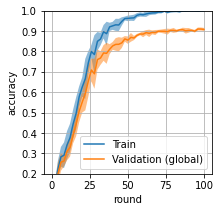

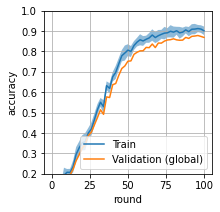

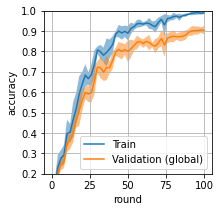

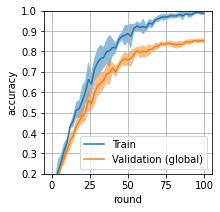

In [3]:
dataset = "MNIST"
model = "LeNet5"
reduced = 0.02
rounds = 100
n_avg = 10
track_history = 2
export_dir = None 
device = "cuda:7"
n_clients = 5
lambda_kd = 10
lambda_disc = 1
feature_dim = 84
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

hlp.plot_global_training_history(pt_kd, metric="accuracy", which=["Train", "Validation (global)"], savepath="./saves/paper/MNIST_N5_R100/cfkd.png")
hlp.plot_global_training_history(pt_fl, metric="accuracy", which=["Train", "Validation (global)"], savepath="./saves/paper/MNIST_N5_R100/fl.png")
hlp.plot_global_training_history(pt_fd, metric="accuracy", which=["Train", "Validation (global)"], savepath="./saves/paper/MNIST_N5_R100/fd.png")
hlp.plot_global_training_history(pt_il, metric="accuracy", which=["Train", "Validation (global)"], savepath="./saves/paper/MNIST_N5_R100/il.png")

In [2]:
dataset = "MNIST"
model = "LeNet5"
reduced = 0.02
rounds = 100
n_avg = 10
track_history = False
export_dir = None 
device = "curda:7"
n_clients = 10
lambda_kd = 10
lambda_disc = 1
feature_dim = 84
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, feature_dim=feature_dim, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 10 clients
Device: cpu
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (5.6s)      
Final average performance:
Train loss: 0.22 | Validation (global) loss: 0.67
Train acc: 98.58% | Validation (global) acc: 81.84%
********************
Running FL with 10 clients
Device: cpu
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (5.9s)      
Final average performance:
Train loss: 0.85 | Validation (global) loss: 0.92
Train acc: 74.25% | Validation (global) acc: 70.06%
********************
Running FD with 10 clients
Device: cpu
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28

# Fashion-MNIST

In [31]:
dataset = "FMNIST"
model = "ResNet9"
reduced = 0.1
rounds = 20
n_avg = 10
track_history = False
export_dir = None 
device = "cuda:7"
n_clients = 2
lambda_kd = 10
lambda_disc = 1
feature_dim = 128
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, feature_dim=feature_dim, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 2 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (5.7s)      
Final average performance:
Train loss: 0.00 | Validation (global) loss: 0.42
Train acc: 100.00% | Validation (global) acc: 88.07%
********************
Running FL with 2 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (4.8s)      
Final average performance:
Train loss: 0.02 | Validation (global) loss: 0.39
Train acc: 99.60% | Validation (global) acc: 89.78%
********************
Running FD with 2 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1

In [32]:
dadataset = "FMNIST"
model = "ResNet9"
reduced = 0.1
rounds = 20
n_avg = 10
track_history = False
export_dir = None 
device = "cuda:7"
n_clients = 5
lambda_kd = 10
lambda_disc = 1
feature_dim = 128
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, feature_dim=feature_dim, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 5 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (7.8s)      
Final average performance:
Train loss: 0.01 | Validation (global) loss: 0.48
Train acc: 99.97% | Validation (global) acc: 84.42%
********************
Running FL with 5 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (6.8s)      
Final average performance:
Train loss: 0.11 | Validation (global) loss: 0.34
Train acc: 96.53% | Validation (global) acc: 89.28%
********************
Running FD with 5 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1,

In [30]:
# Figure MNIST
dataset = "FMNIST"
model = "ResNet9"
reduced = 0.1
rounds = 20
n_avg = 10
track_history = 0
export_dir = None 
device = "cuda:7"
n_clients = 10
lambda_kd = 10
lambda_disc = 1
feature_dim = 128
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, feature_dim=feature_dim, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 10 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (10.8s)      
Final average performance:
Train loss: 0.04 | Validation (global) loss: 0.54
Train acc: 100.00% | Validation (global) acc: 81.16%
********************
Running FL with 10 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 20 done. (10.0s)      
Final average performance:
Train loss: 0.18 | Validation (global) loss: 0.35
Train acc: 93.87% | Validation (global) acc: 88.21%
********************
Running FD with 10 clients
Device: cuda:7
** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (60

# CIFAR10

In [46]:
dataset = "CIFAR10"
model = "ResNet18"
reduced = 0.2
rounds = 20
n_avg = 10
track_history = 0
export_dir = None 
device = "cuda:2"
n_clients = 2
lambda_kd = 10
lambda_disc = 1
feature_dim = 256
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, feature_dim=feature_dim, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 2 clients
Device: cuda:2
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)
Round 20 done. (19.7s)      
Final average performance:
Train loss: 0.02 | Validation (global) loss: 1.37
Train acc: 99.78% | Validation (global) acc: 63.59%
********************
Running FL with 2 clients
Device: cuda:2
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)
Round 20 done. (17.5s)      
Final average performance:
Train loss: 0.23 | Validation (global) loss: 1.12
Train acc: 92.29% | Validation (global) acc: 67.38%
**

In [47]:
dataset = "CIFAR10"
model = "ResNet18"
reduced = 0.2
rounds = 20
n_avg = 10
track_history = 0
export_dir = None 
device = "cuda:7"
n_clients = 5
lambda_kd = 10
lambda_disc = 1
feature_dim = 256
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, feature_dim=feature_dim, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 5 clients
Device: cuda:7
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)
Round 20 done. (23.3s)      
Final average performance:
Train loss: 0.07 | Validation (global) loss: 1.96
Train acc: 98.74% | Validation (global) acc: 47.49%
********************
Running FL with 5 clients
Device: cuda:7
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)
Round 20 done. (21.2s)      
Final average performance:
Train loss: 0.99 | Validation (global) loss: 1.15
Train acc: 64.30% | Validation (global) acc: 59.13%
**

In [2]:
dataset = "CIFAR10"
model = "ResNet18"
reduced = 0.2
rounds = 20
n_avg = 10
track_history = False
export_dir = None 
device = "cuda:3"
n_clients = 10
lambda_kd = 10
lambda_disc = 1
feature_dim = 256
seed = 0
# Experiment
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                                       reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                                       export_dir=export_dir, device=device, seed=seed)

****************************************
Starting benchmark
****************************************
Running CFKD with 10 clients
Device: cuda:3
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)
Round 20 done. (41.2s)      
Final average performance:
Train loss: 0.27 | Validation (global) loss: 2.11
Train acc: 93.96% | Validation (global) acc: 36.63%
********************
Running FD with 10 clients
Device: cuda:3
** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (10000, 3, 32, 32) (122.96 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)
Round 20 done. (40.0s)      
Final average performance:
Train loss: 1.74 | Validation (global) loss: 2.08
Train acc: 66.36% | Validation (global) acc: 31.54%


# tSNE

In [43]:
dataset = "MNIST"
model = "LeNet5"
reduced = 0.02
rounds = 100
n_avg = 10
track_history = 1
export_dir = None 
device = "cuda:7"
n_clients = 2
lambda_kd = 10
lambda_disc = 1
feature_dim = 84
seed = 0
# Experiment
pt_list, tracker = run(n_clients=n_clients, dataset=dataset, model=model, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                      reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                      export_dir=export_dir, device=device, seed=seed)
pt_il_list, tracker_il = run(n_clients=n_clients, dataset=dataset, model=model, preset="il",
                      reduced=reduced, rounds=rounds, track_history=track_history, 
                      export_dir=export_dir, device=device, seed=seed)
pt_fl_list, tracker_fl = run(n_clients=n_clients, dataset=dataset, model=model, preset="fl",
                      reduced=reduced, rounds=rounds, track_history=track_history, 
                      export_dir=export_dir, device=device, seed=seed)



Running IL with 2 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (0.7s)      
Final average performance:
Train loss: 0.02 | Validation (global) loss: 0.32
Train acc: 99.92% | Validation (global) acc: 91.25%
Running FD with 2 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (0.6s)      
Final average performance:
Train loss: 0.07 | Validation (global) loss: 0.28
Train acc: 99.67% | Validation (global) acc: 92.10%
Running FL with 2 clients
Device: cuda:7
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (0.7s)      
Final average performance:
Train loss: 0.10 | Valida

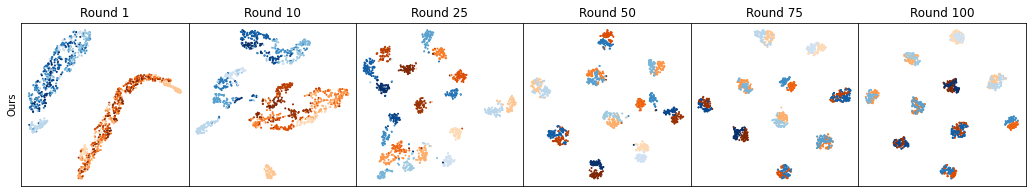

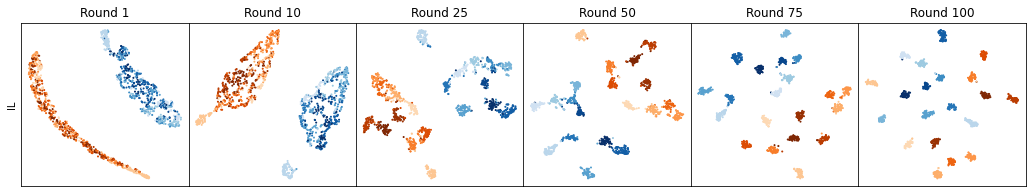

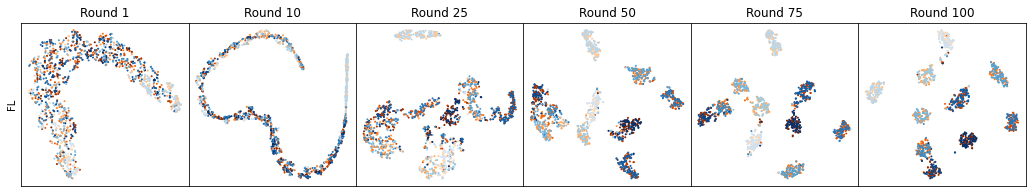

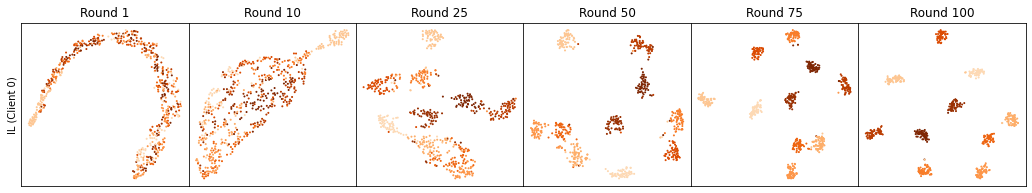

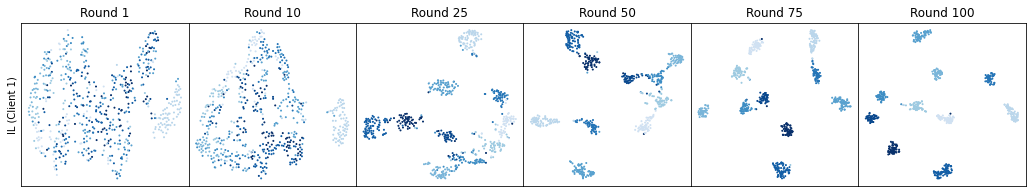

In [57]:
# Seperated figures
r_list = [1, 10, 25, 50, 75, 100]
fig, axs = plt.subplots(5, len(r_list), figsize=(3*len(r_list), 3))
tracker.plot_tSNE(r_list=r_list, savepath="./saves/paper/MNIST_N2_R100/tSNE_cfkd.png", title="Ours")
tracker_il.plot_tSNE(r_list=r_list, savepath="./saves/paper/MNIST_N2_R100/tSNE_il.png", title="IL")
tracker_fl.plot_tSNE(r_list=r_list, savepath="./saves/paper/MNIST_N2_R100/tSNE_fl.png", title="FL")
tracker_il.plot_tSNE(r_list=r_list, single_client=0, savepath="./saves/paper/MNIST_N2_R100/tSNE_il0.png", title="IL (Client 0)")
tracker_il.plot_tSNE(r_list=r_list, single_client=1, savepath="./saves/paper/MNIST_N2_R100/tSNE_il1.png", title="IL (Client 1)")

NameError: name 'tracker' is not defined

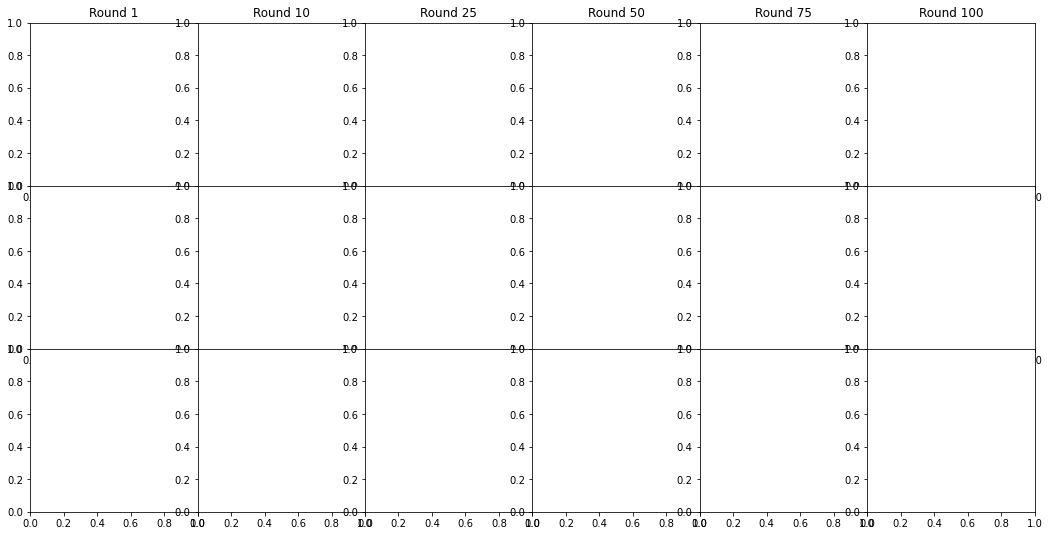

In [4]:
# Single figure
r_list = [1, 10, 25, 50, 75, 100]
fig, axs = plt.subplots(3, len(r_list), figsize=(3*len(r_list), 3*3))
plt.subplots_adjust(hspace=0, wspace=0)
[axs[0,i].set_title("Round {}".format(r)) for i, r in enumerate(r_list)]
tracker.plot_tSNE(r_list=r_list, title="Ours", fig_axs=(fig, axs[0,:]))
tracker_il.plot_tSNE(r_list=r_list, title="IL", fig_axs=(fig, axs[1,:]))
tracker_fl.plot_tSNE(r_list=r_list, title="FL", savepath="./saves/paper/MNIST_N2_R100/tSNE.png", fig_axs=(fig, axs[2,:]))

# Lambda sudy

In [8]:
dataset = "MNIST"
model = "LeNet5"
reduced = 0.02
rounds = 100
n_avg = 10
track_history = False
export_dir = None #"./saves/MNIST_test"
device = "cuda:3"
n_clients = 5
feature_dim = 84
seed = 0

lambda_kd_list = [0, 0.1, 0.5, 1, 2, 4, 8, 10]
lambda_disc_list = [0, 0.1, 0.5, 1, 2, 4, 8, 10]

tr_loss = np.zeros((len(lambda_kd_list), len(lambda_disc_list)))
val_loss = np.zeros((len(lambda_kd_list), len(lambda_disc_list)))
tr_acc = np.zeros((len(lambda_kd_list), len(lambda_disc_list)))
val_acc = np.zeros((len(lambda_kd_list), len(lambda_disc_list)))

for i_kd, lambda_kd in enumerate(lambda_kd_list):
    for i_disc, lambda_disc in enumerate(lambda_disc_list):
        pt_kd, _ = run(n_clients=n_clients, dataset=dataset, model=model, lambda_kd=lambda_kd, lambda_disc=lambda_disc,
                    reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, 
                    export_dir=export_dir, device=device, seed=seed)
            
        tr_loss[i_kd, i_disc] = np.array([pt.perf_histories["Train"]["loss"][-1] for pt in pt_kd]).mean()
        val_loss[i_kd, i_disc] = np.array([pt.perf_histories["Validation (global)"]["loss"][-1] for pt in pt_kd]).mean()
        tr_acc[i_kd, i_disc] = np.array([pt.perf_histories["Train"]["accuracy"][-1] for pt in pt_kd]).mean()
        val_acc[i_kd, i_disc] = np.array([pt.perf_histories["Validation (global)"]["accuracy"][-1] for pt in pt_kd]).mean()

Running CFKD with 5 clients
Device: cuda:3
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (1.3s)      
Final average performance:
Train loss: 0.07 | Validation (global) loss: 0.50
Train acc: 99.00% | Validation (global) acc: 85.02%
Running CFKD with 5 clients
Device: cuda:3
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (1.3s)      
Final average performance:
Train loss: 0.07 | Validation (global) loss: 0.51
Train acc: 98.92% | Validation (global) acc: 84.57%
Running CFKD with 5 clients
Device: cuda:3
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)
Round 100 done. (1.2s)      
Final average performance:
Train loss: 0.07 | 

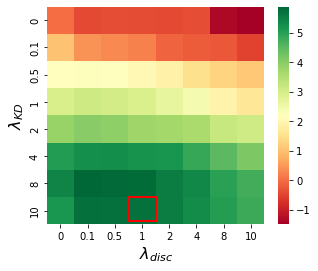

In [74]:
import seaborn as sns
import matplotlib
fig, ax = plt.subplots(1,1, figsize=(5,4))
data = (val_acc-val_acc[0,0]) * 100
sns.heatmap(data, cmap="RdYlGn", annot=False, cbar=True, square=True, ax=ax, xticklabels=lambda_disc_list, yticklabels=lambda_kd_list)
ax.set_xlabel("$\lambda_{disc}$", fontsize=16)
ax.set_ylabel("$\lambda_{KD}$", fontsize=16)
ax.add_patch(matplotlib.patches.Rectangle((3, 7), 1.0, 0.9, edgecolor='red', fill=False, lw=2))
#fig.savefig("./saves/paper/MNIST_N5_R100/lambda_ablation.png", bbox_inches='tight')

# Number of parameters

In [79]:
print("LeNet5 for MNIST")
m_lenet = mdl.LeNet5(1, 84, 10)
hlp.model_size(m_lenet)

print("ResNet9 for FMNIST")
m_rn9 = mdl.ResNet9(1, 128, 10)
hlp.model_size(m_rn9)

print("ResNet18 for MNIST")
m_rn18 = mdl.ResNet18(3, 256, 10)
hlp.model_size(m_rn18)

Number of parameter: 30986
Model size: 0.123944 MB
Number of parameter: 2470730
Model size: 9.89476 MB
Number of parameter: 11302730
Model size: 45.24948 MB
